<a href="https://colab.research.google.com/github/Fidhavk/BIG-DATA-ANALYSIS/blob/main/Data_Intrnshp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install PySpark

In [3]:
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.appName ('Online retail').getOrCreate()

In [5]:
df = spark.read.csv('/content/online_retail.csv', header = True, inferSchema=True)

In [6]:
df.show(5)

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
only showing top 5 rows


In [7]:
df.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: timestamp (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: double (nullable = true)
 |-- Country: string (nullable = true)



In [8]:
df.count()

293673

In [9]:
from pyspark.sql.functions import col


In [10]:
df_clean= df.dropna(subset=['CustomerID','Description'])
df_clean = df_clean.filter(col('Quantity')>0)

df_clean.count()

206246

In [11]:
df_clean = df_clean.withColumn(
    'TotalPrice',
    col('Quantity')* col('UnitPrice')
    )
df_clean.select('Quantity','UnitPrice','TotalPrice').show(5)

+--------+---------+------------------+
|Quantity|UnitPrice|        TotalPrice|
+--------+---------+------------------+
|       6|     2.55|15.299999999999999|
|       6|     3.39|             20.34|
|       8|     2.75|              22.0|
|       6|     3.39|             20.34|
|       6|     3.39|             20.34|
+--------+---------+------------------+
only showing top 5 rows


In [12]:
from pyspark.sql.functions import sum

In [13]:
Product_sales = df_clean.groupBy('Description')\
.agg(sum('Quantity').alias('Total_Quantity'))\
.orderBy(col('Total_Quantity').desc())

In [14]:
Product_sales.show(10)

+--------------------+--------------+
|         Description|Total_Quantity|
+--------------------+--------------+
|MEDIUM CERAMIC TO...|         76236|
|WORLD WAR 2 GLIDE...|         34804|
|JUMBO BAG RED RET...|         25817|
|WHITE HANGING HEA...|         25418|
|PACK OF 72 RETROS...|         23394|
|ASSORTED COLOUR B...|         20546|
|ASSORTED COLOURS ...|         19236|
|PACK OF 12 LONDON...|         18290|
|SMALL POPCORN HOLDER|         18004|
|PACK OF 60 PINK P...|         17032|
+--------------------+--------------+
only showing top 10 rows


In [15]:
country_revenue = df_clean.groupBy('Country')\
.agg(sum('TotalPrice').alias('Total_Revenue'))\
.orderBy(col('Total_Revenue').desc())


In [16]:
country_revenue.show(10)

+--------------+------------------+
|       Country|     Total_Revenue|
+--------------+------------------+
|United Kingdom| 3873724.621999548|
|          EIRE|152730.60999999964|
|   Netherlands| 139870.5899999999|
|       Germany|129244.61000000042|
|        France|102314.93999999997|
|     Australia| 86532.12999999995|
|         Spain| 36276.28000000009|
|   Switzerland| 31423.67000000002|
|         Japan|26896.169999999995|
|        Sweden|24456.970000000005|
+--------------+------------------+
only showing top 10 rows


In [17]:
customer_spending = df_clean.groupBy('CustomerID')\
.agg(sum('TotalPrice').alias('Spending'))\
.orderBy(col('Spending').desc())

In [18]:
customer_spending.show(10)

+----------+------------------+
|CustomerID|          Spending|
+----------+------------------+
|   14646.0|136028.12999999995|
|   18102.0|130537.22999999998|
|   14156.0| 81702.74000000005|
|   12415.0| 77265.72000000003|
|   12346.0|           77183.6|
|   17450.0|          69650.88|
|   14911.0| 66686.66000000012|
|   17511.0| 52918.58999999998|
|   15749.0|           44534.3|
|   16029.0| 43933.85999999998|
+----------+------------------+
only showing top 10 rows


In [19]:
from pyspark.sql.functions import month

In [20]:
df_clean = df_clean.withColumn('Month',month('InvoiceDate'))

In [21]:
monthly_sales = df_clean.groupBy('Month')\
.agg(sum('TotalPrice').alias('Total_Sales'))\
.orderBy('Month')

In [22]:
monthly_sales.show()

+-----+------------------+
|Month|       Total_Sales|
+-----+------------------+
|    1| 569445.0400000077|
|    2| 447137.3500000165|
|    3|  595500.760000013|
|    4|469200.36100001173|
|    5| 678594.5600000018|
|    6| 661213.6900000116|
|    7| 600091.0110000141|
|    8|162959.75000000038|
|   12| 572713.8900000163|
+-----+------------------+



In [23]:
monthly_pd = monthly_sales.toPandas()
monthly_pd

,Month,Total_Sales
0,1,569445.040
1,2,447137.350
2,3,595500.760
3,4,469200.361
4,5,678594.560
5,6,661213.690
6,7,600091.011
7,8,162959.750
8,12,572713.890


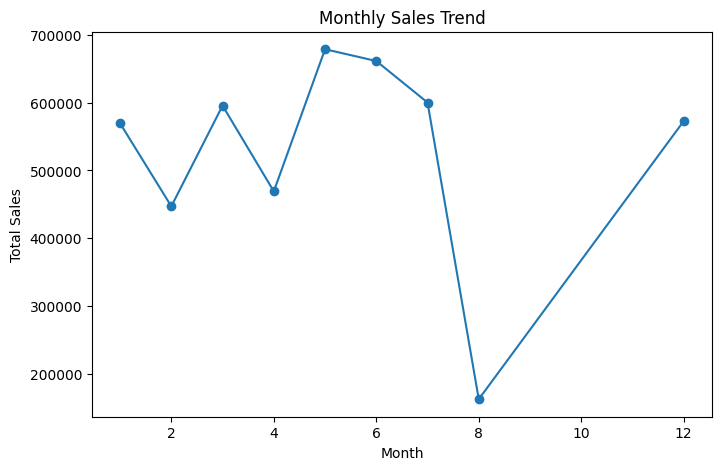

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(monthly_pd['Month'],
monthly_pd['Total_Sales'],marker='o')


plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.show()


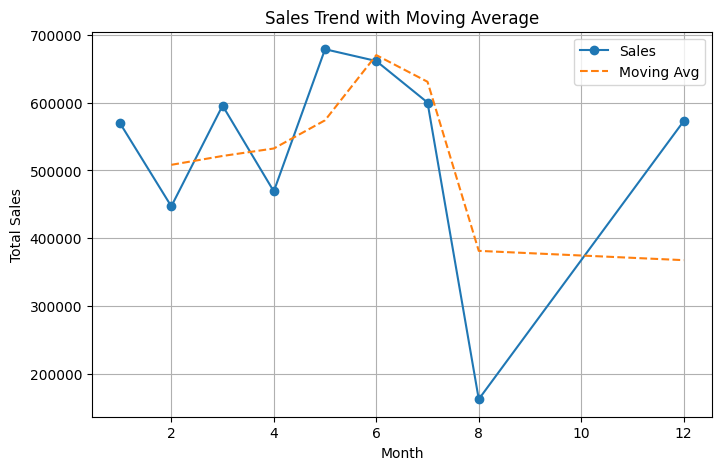

In [26]:
plt.figure(figsize=(8,5))
plt.plot(monthly_pd["Month"], monthly_pd["Total_Sales"], marker='o', label="Sales")
plt.plot(monthly_pd["Month"], monthly_pd["Moving_Avg"], linestyle='--', label="Moving Avg")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Sales Trend with Moving Average")
plt.legend()
plt.grid(True)
plt.show()

In [27]:
from pyspark.sql.functions import sum

country_sales = df_clean.groupBy("Country") \
    .agg(sum("TotalPrice").alias("Total_Sales")) \
    .orderBy("Total_Sales", ascending=False)

country_sales.show(5)

+--------------+------------------+
|       Country|       Total_Sales|
+--------------+------------------+
|United Kingdom| 3873724.621999548|
|          EIRE|152730.60999999964|
|   Netherlands| 139870.5899999999|
|       Germany|129244.61000000042|
|        France|102314.93999999997|
+--------------+------------------+
only showing top 5 rows


##